In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.layers.normalization import batch_normalization
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.layers import Dropout
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm
import cv2
from glob import glob
import seaborn as sns
sns.set()

import sklearn
import skimage
from skimage.transform import resize

import random
from skimage.color import rgb2gray
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score

In [2]:
"""
Cylindrical_data = os.listdir("C:/Users/INFO PLUS/Desktop/Stage CDTA/sEMG-signal-classification-master/specto/Cylindrical/")
Houk_data = os.listdir("C:/Users/INFO PLUS/Desktop/Stage CDTA/sEMG-signal-classification-master/specto/Hook/")
Tip_data = os.listdir("C:/Users/INFO PLUS/Desktop/Stage CDTA/sEMG-signal-classification-master/specto/Tip/")
Palmar_data = os.listdir("C:/Users/INFO PLUS/Desktop/Stage CDTA/sEMG-signal-classification-master/specto/Palmar/")
Spherical_data = os.listdir("C:/Users/INFO PLUS/Desktop/Stage CDTA/sEMG-signal-classification-master/specto/Spherical/")
Lateral_data = os.listdir("C:/Users/INFO PLUS/Desktop/Stage CDTA/sEMG-signal-classification-master/specto/Lateral/")
"""

'\nCylindrical_data = os.listdir("C:/Users/INFO PLUS/Desktop/Stage CDTA/sEMG-signal-classification-master/specto/Cylindrical/")\nHouk_data = os.listdir("C:/Users/INFO PLUS/Desktop/Stage CDTA/sEMG-signal-classification-master/specto/Hook/")\nTip_data = os.listdir("C:/Users/INFO PLUS/Desktop/Stage CDTA/sEMG-signal-classification-master/specto/Tip/")\nPalmar_data = os.listdir("C:/Users/INFO PLUS/Desktop/Stage CDTA/sEMG-signal-classification-master/specto/Palmar/")\nSpherical_data = os.listdir("C:/Users/INFO PLUS/Desktop/Stage CDTA/sEMG-signal-classification-master/specto/Spherical/")\nLateral_data = os.listdir("C:/Users/INFO PLUS/Desktop/Stage CDTA/sEMG-signal-classification-master/specto/Lateral/")\n'

In [3]:
train = "C:/Users/INFO PLUS/Desktop/Stage CDTA/sEMG-signal-classification-master/specto/train"

test = "C:/Users/INFO PLUS/Desktop/Stage CDTA/sEMG-signal-classification-master/specto/test"



LOAD_FROM_IMAGES = True

def get_data(folder):
    x = []
    y = []
    for folderName in os.listdir(folder):
        if not folderName.startswith("."):
            if folderName in ["Cylindrical"]:
                label = 1
            elif folderName in ["Hook"]:
                label = 2
            elif folderName in ["Lateral"]:
                label = 3
            elif folderName in ["Palmar"]:
                label = 4
            elif folderName in ["Spherical"]:
                label = 5
            elif folderName in ["Tip"]:
                label = 6
            else:
                label = 0
            for image_filename in tqdm(os.listdir(folder +"/" +folderName+"/")):
                img_file = cv2.imread(folder + "/" +folderName + "/" + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file,(128,128,3), mode = "constant",anti_aliasing=True)
                    #img_file = rgb2gray(img_file)
                    img_arr = np.asarray(img_file)
                    x.append(img_arr)
                    y.append(label)
    x = np.asarray(x)
    y = np.asarray(y)
    return x,y


if LOAD_FROM_IMAGES:
    X_train,y_train = get_data(train)
    X_test, y_test = get_data(test)
    
    np.save("xtrain.npy",X_train)
    np.save("ytrain.npy",y_train)
    np.save("xtest.npy",X_test)
    np.save("ytest.npy",y_test)
else:
    X_train = np.load("xtrain.npy")
    y_train = np.load("ytrain.npy")
    X_test = np.load("xtest.npy")
    y_test = np.load("ytest.npy")

100%|██████████| 31/31 [00:08<00:00,  3.61it/s]


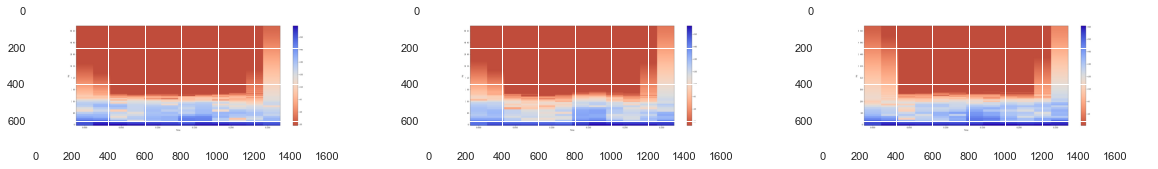

In [4]:
glob_img = glob("C:/Users/INFO PLUS/Desktop/Stage CDTA/sEMG-signal-classification-master/specto/test/Cylindrical/**")

def plot(images):
    z = random.sample(images,3)
    plt.figure(figsize=(20,20))
    plt.subplot(131)
    plt.imshow(cv2.imread(z[0]))
    plt.subplot(132)
    plt.imshow(cv2.imread(z[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(z[2]))

plot(glob_img)

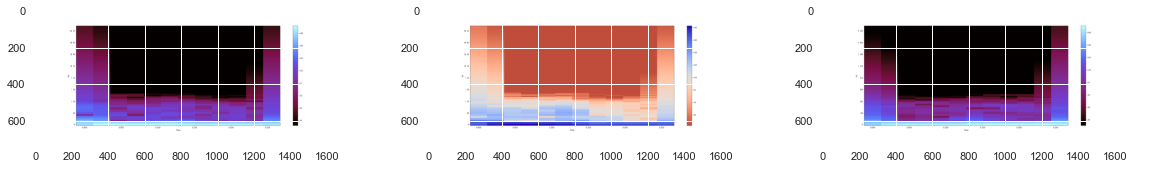

In [5]:
glob_img = glob("C:/Users/INFO PLUS/Desktop/Stage CDTA/sEMG-signal-classification-master/specto/test/Hook/**")

def plot(images):
    z = random.sample(images,3)
    plt.figure(figsize=(20,20))
    plt.subplot(131)
    plt.imshow(cv2.imread(z[0]))
    plt.subplot(132)
    plt.imshow(cv2.imread(z[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(z[2]))

plot(glob_img)

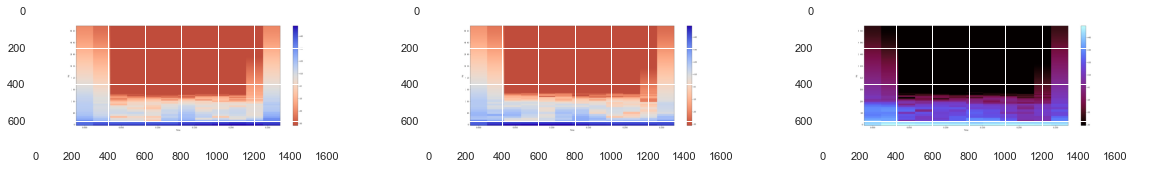

In [6]:
glob_img = glob("C:/Users/INFO PLUS/Desktop/Stage CDTA/sEMG-signal-classification-master/specto/test/Palmar/**")

def plot(images):
    z = random.sample(images,3)
    plt.figure(figsize=(20,20))
    plt.subplot(131)
    plt.imshow(cv2.imread(z[0]))
    plt.subplot(132)
    plt.imshow(cv2.imread(z[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(z[2]))

plot(glob_img)

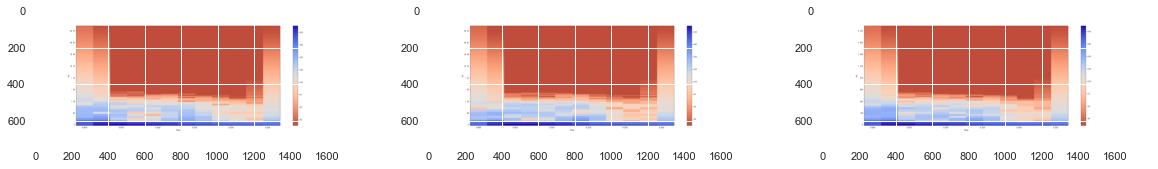

In [7]:
glob_img = glob("C:/Users/INFO PLUS/Desktop/Stage CDTA/sEMG-signal-classification-master/specto/test/Tip/**")

def plot(images):
    z = random.sample(images,3)
    plt.figure(figsize=(20,20))
    plt.subplot(131)
    plt.imshow(cv2.imread(z[0]))
    plt.subplot(132)
    plt.imshow(cv2.imread(z[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(z[2]))

plot(glob_img)

In [8]:
X_train.shape

(714, 128, 128, 3)

In [9]:
from keras.layers import BatchNormalization

In [10]:
model = models.Sequential()

model.add(layers.Conv2D(64,(3,3),activation="relu",input_shape=(128,128,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(128,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(layers.Dense(7,activation="softmax"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 63, 63, 64)       256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 63, 63, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0

In [12]:
model.compile(optimizer = "adam" , loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [13]:
batch_size=8
epochs=50

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

custom_early_stopping = EarlyStopping(
    monitor='accuracy', 
    patience=80,
    restore_best_weights=True
)

In [15]:
history =  model.fit(X_train, y_train, batch_size=batch_size,epochs=epochs,
                              verbose=1,
                              validation_data =(X_test,y_test),callbacks=[custom_early_stopping])

Epoch 1/50
90/90 [==============================] - 47s 468ms/step - loss: 2.1393 - accuracy: 0.2409 - val_loss: 3.0847 - val_accuracy: 0.1667
Epoch 2/50
90/90 [==============================] - 41s 451ms/step - loss: 1.8727 - accuracy: 0.2759 - val_loss: 2.3964 - val_accuracy: 0.2043
Epoch 3/50
90/90 [==============================] - 40s 445ms/step - loss: 1.7222 - accuracy: 0.3207 - val_loss: 3.6494 - val_accuracy: 0.1667
Epoch 4/50
90/90 [==============================] - 41s 451ms/step - loss: 1.6925 - accuracy: 0.2927 - val_loss: 3.4953 - val_accuracy: 0.1667
Epoch 5/50
90/90 [==============================] - 40s 446ms/step - loss: 1.6139 - accuracy: 0.3165 - val_loss: 4.8812 - val_accuracy: 0.1667
Epoch 6/50
90/90 [==============================] - 41s 452ms/step - loss: 1.6227 - accuracy: 0.3207 - val_loss: 1.7246 - val_accuracy: 0.3065
Epoch 7/50
90/90 [==============================] - 41s 451ms/step - loss: 1.5292 - accuracy: 0.3543 - val_loss: 1.8431 - val_accuracy: 0.2258

6/6 [==============================] - 2s 398ms/step - loss: 2.1403 - accuracy: 0.3011
final overall accuracy for test :  30.1075279712677 %


<function matplotlib.pyplot.show(close=None, block=None)>

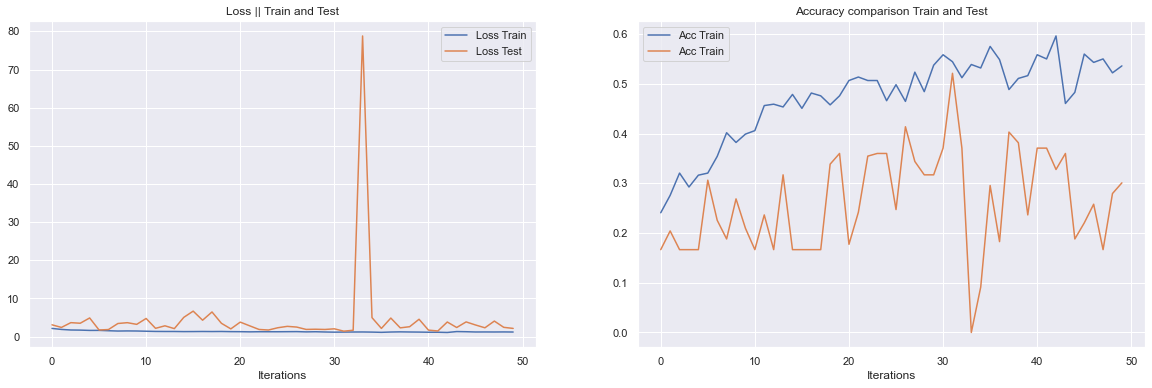

In [17]:
#from cProfile import label


print("final overall accuracy for test : ", model.evaluate(X_test, y_test)[1]*100, "%")

epochs = [i for i in range(50)]
fig, ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs, train_loss, label ='Loss Train')
ax[0].plot(epochs, test_loss, label ='Loss Test')
ax[0].set_title('Loss || Train and Test')
ax[0].legend()
ax[0].set_xlabel("Iterations")

ax[1].plot(epochs, train_acc, label ='Acc Train')
ax[1].plot(epochs, test_acc, label ='Acc Train')
ax[1].set_title('Accuracy comparison Train and Test')
ax[1].legend()
ax[1].set_xlabel("Iterations")
plt.show